# This plots components of the behavior and fitness functions

In [2]:
push!(LOAD_PATH, pwd()) # put current directory on path
using Revise
using UnPack
using LaTeXStrings
using CooperativeHuntingPkg
using Plots
default(
    guidefontsize=22,   # controls xlabel, ylabel, title font size
    tickfontsize=16,    # controls axis number labels
    legendfontsize=18,  # controls legend font
    linewidth=2,        # controls default line thickness
    grid = false,        # turns off grid in background
    fontfamily="Computer Modern" # font family that matches latex
)
using Plots.PlotMeasures
using Measures # helps for adjusting location of axis labels

fig_path = "/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/"

"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/"

# Capture Probability

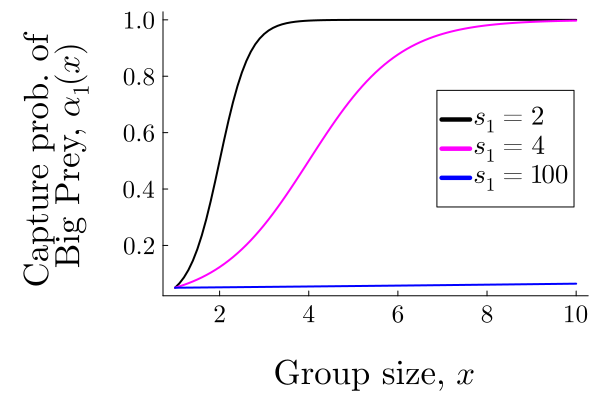

In [3]:
parameters = Dict(
    :α1_of_1 => 0.05,
    :α2_of_1 => 0.95,
    :s1 => 2
)

x = 1:0.1:10
α1_of_1 = 0.05
s1_values = [2, 4, 100]
colors = [:black, :magenta, :blue]

plt = plot()
for (i, s1) in enumerate(s1_values)
    params = (α1_of_1 = α1_of_1, s1 = s1)
    
    plot!(plt, x, fun_alpha1(x, params),
        label = L"s_1 = %$s1", color = colors[i], lw=2)
end
xlabel!(plt, "\n"*L"Group size, $x$")
ylabel!(plt, "Capture prob. of \n"*L"Big Prey, $\alpha_1(x)$"*"\n")
plot!(plt, legend=:right, left_margin = 10mm, bottom_margin = 5mm)
plt


In [30]:
savefig(plt, fig_path*"Diagram/Capture.pdf")

"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/Diagram/Capture.pdf"

In [4]:
function curve_groups_form(x, N1, N2, params)
    """
    Plots curves above which groups form, assuming H1a = H2a = 0
    and that parameters follow allometric scaling rules
    """
    @unpack α2_of_1, A1, A2 = params
    α2 = α2_of_1
    denominator = A1 .* N1 .* (fun_alpha1(x,params) .- x * fun_alpha1(1,params))
    if denominator > 0
        numerator = A2 .* N2 .* α2 .* (x .- 1)
        bratio_curve = numerator ./ denominator
        return bratio_curve
    else
        return NaN
    end

end

curve_groups_form (generic function with 1 method)

In [5]:
N1_values = 0:0.01:1
N2 = 0.5

params = Dict(
    :A1 => 0.5,
    :A2 => 0.5,
    :α1_of_1 => 0.05,
    :α2_of_1 => 0.95,
    :s1 => 2
)
plt = plot()
colors = [:blue, :black, :red, :magenta]

for (i,x) in enumerate(2:5)
    βratio = [curve_groups_form(x,N1,N2,params) for N1 in N1_values]
    plot!(βratio, N1_values, label = L"x=%$x", color = colors[i])
end
plot!(size=(700,600),
    xlim = [0.95,10.01], xlabel ="\n"* L"Benefit ratio, $\beta_1/\beta_2$",
    bottom_margin=5mm, ylabel = "Big Prey Pop.\nSize, "*L"N_1", 
    left_margin = 5mm)
savefig(plt, fig_path*"condition_x_forms_constant.pdf")


"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/condition_x_forms_constant.pdf"

In [6]:
params[:s1]=2.5
N1_values = 0:0.01:1
N2 = 0.5
# this is in python:
x=2

plt = plot()
colors = [:blue, :black, :red, :magenta]

for (i,x) in enumerate(2:5)
    βratio = [curve_groups_form(x,N1,N2,params) for N1 in N1_values]
    plot!(βratio, N1_values, label = L"x=%$x", color = colors[i])
end
plot!(size=(700,600),
    xlim = [0.95,10.01], xlabel ="\n"* L"Benefit ratio, $\beta_1/\beta_2$",
    bottom_margin=5mm, ylabel = "Big Prey Pop.\nSize, "*L"N_1", 
    left_margin = 5mm)

savefig(plt, fig_path*"condition_x_forms_constant_s_2_5.pdf")



"/Users/taliaborofsky/Documents/CH_GroupFormation/CH_manuscript/FIgures/condition_x_forms_constant_s_2_5.pdf"